In [61]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load the dataset 
df = pd.read_csv(r'..\data\Student_performance_data .csv')


## Understanding the Data

In [62]:
# basic info 
print("Columns:", df.columns) # displays the column names
print("Information:") 
print(df.info()) #displays dataset information         
print("Summary Statistics (Numerical):")
print(df.describe().T)# displays stats for numeric columns
print("Missing Values:", df.isnull().sum().sum())

Columns: Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int

## Exploratory Data Analysis

Univariate Analysis

In [63]:
# define the numerical and categorical features
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = [
    'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'
]

In [64]:
# fefine mappings for categorical variables
gender_map = {0: 'Male', 1: 'Female'}
ethnicity_map = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parental_education_map = {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher Study'}
tutoring_map = {0: 'No', 1: 'Yes'}
parental_support_map = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
extracurricular_map = {0: 'No', 1: 'Yes'}
sports_map = {0: 'No', 1: 'Yes'}
music_map = {0: 'No', 1: 'Yes'}
volunteering_map = {0: 'No', 1: 'Yes'}
grade_class_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}

# apply mappings 
df['Gender'] = df['Gender'].map(gender_map)
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_map)
df['ParentalEducation'] = df['ParentalEducation'].map(parental_education_map)
df['Tutoring'] = df['Tutoring'].map(tutoring_map)
df['ParentalSupport'] = df['ParentalSupport'].map(parental_support_map)
df['Extracurricular'] = df['Extracurricular'].map(extracurricular_map)
df['Sports'] = df['Sports'].map(sports_map)
df['Music'] = df['Music'].map(music_map)
df['Volunteering'] = df['Volunteering'].map(volunteering_map)
df['GradeClass'] = df['GradeClass'].map(grade_class_map)

parental_education_order = ['None', 'High School', 'Some College', "Bachelor's", 'Higher Study']
parental_support_order = ['None', 'Low', 'Moderate', 'High', 'Very High']
grade_class_order = ['A', 'B', 'C', 'D', 'F']

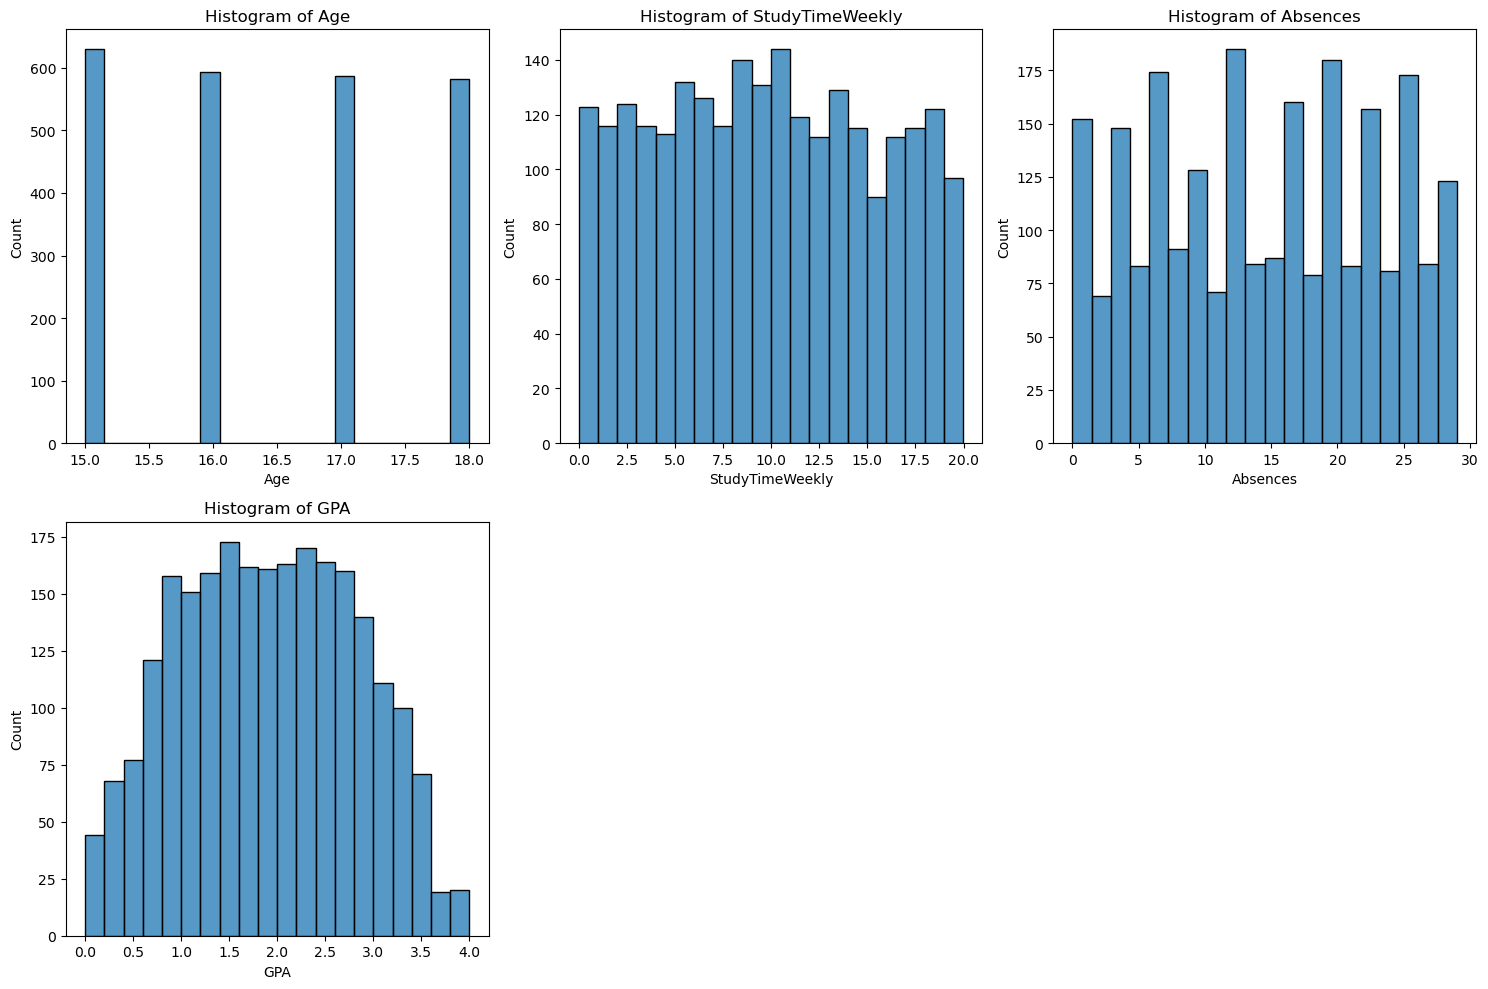

In [65]:
#numerical
n_cols = 3
n_rows_num = (len(numerical_features) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows_num, n_cols, figsize=(15, 5 * n_rows_num))
axes = axes.flatten()

# histograms for numerical features
for idx, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=20, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
# removes empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
# plt.savefig('numerical_histograms.png', dpi=300, bbox_inches='tight') # saves pic used for report
plt.show()
plt.close()

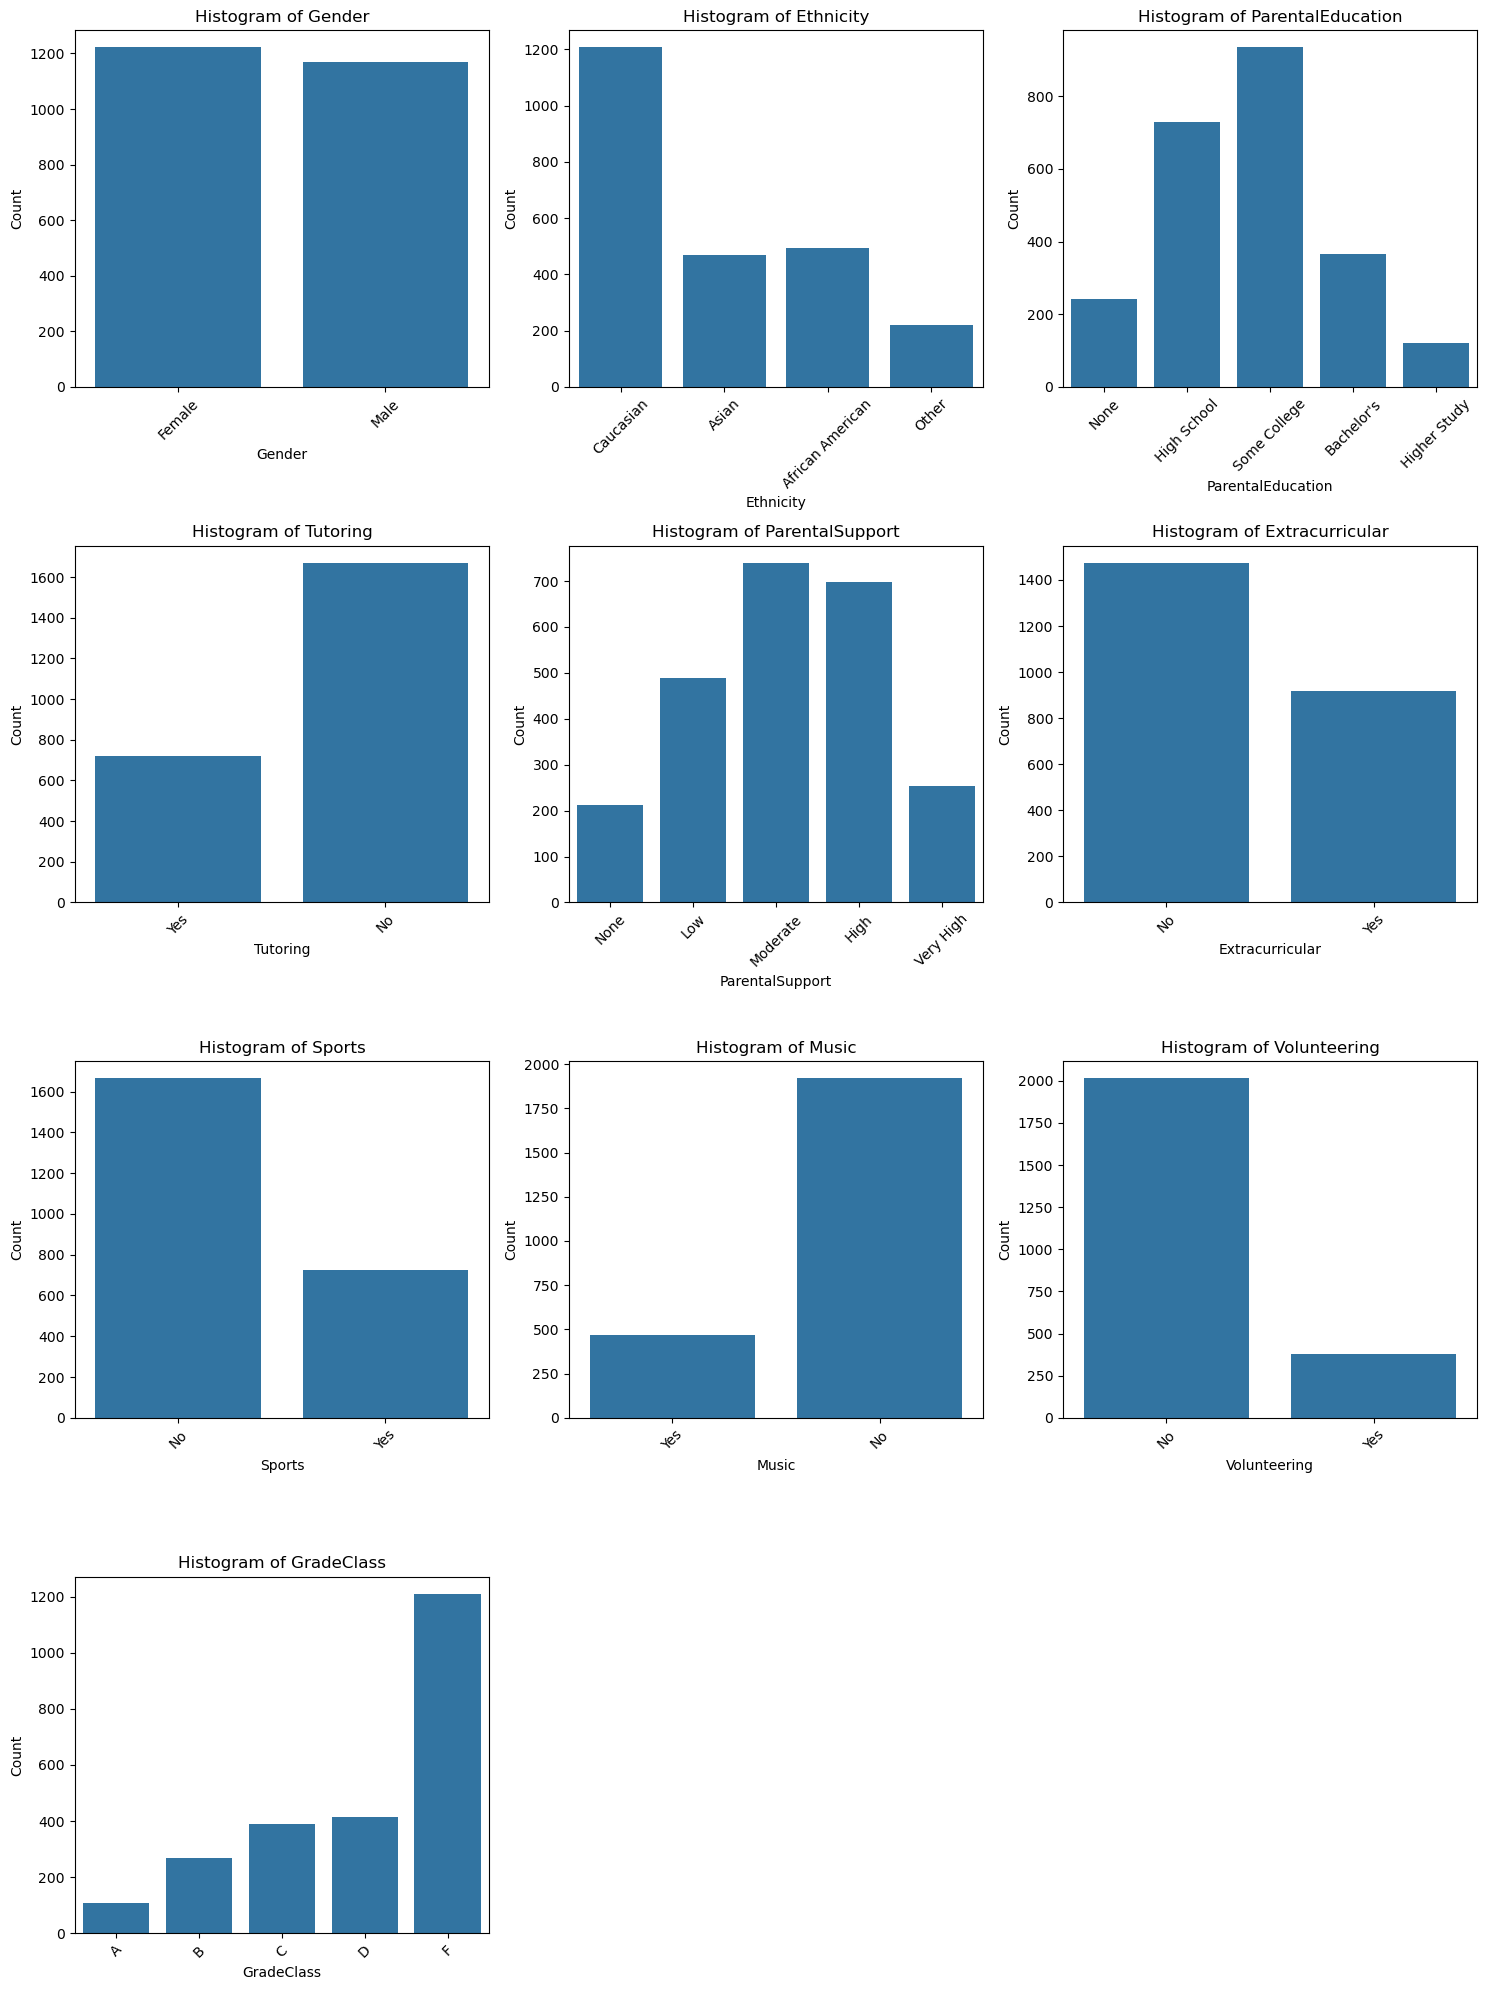

In [66]:
#categorical
n_rows_cat = (len(categorical_features) + n_cols - 1) // n_cols  # Ceiling division: 10 / 3 = 4 rows
fig, axes = plt.subplots(n_rows_cat, n_cols, figsize=(15, 5 * n_rows_cat))
axes = axes.flatten()

# count plots for categorical features
for idx, feature in enumerate(categorical_features):
    if feature == 'ParentalEducation': # set the order for specific features
        order = parental_education_order
    elif feature == 'ParentalSupport':
        order = parental_support_order
    elif feature == 'GradeClass':
        order = grade_class_order
    else:
        order = None  # Default order for other features

    sns.countplot(x=feature, data=df, ax=axes[idx], order=order)
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and save
plt.tight_layout()
# plt.savefig('categorical_histograms.png', dpi=300, bbox_inches='tight') # saves pic used for report
plt.show()
plt.close()

Bivariate Analysis

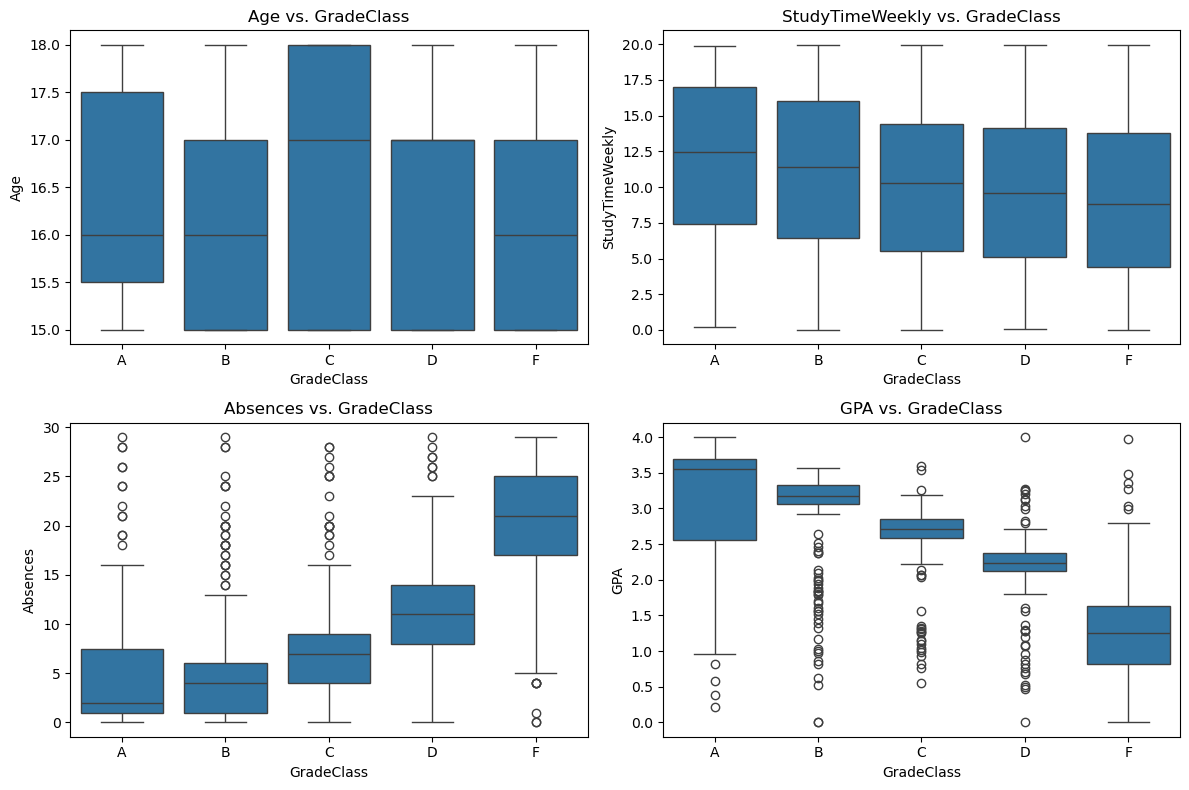

In [67]:
#numerical 
#displays boxplots comparing the gradclass to the other features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='GradeClass', y=feature, data=df, ax=axes[idx], order=grade_class_order)
    axes[idx].set_title(f'{feature} vs. GradeClass')
    axes[idx].set_xlabel('GradeClass')
    axes[idx].set_ylabel(feature)
plt.tight_layout()
plt.show()
plt.close()

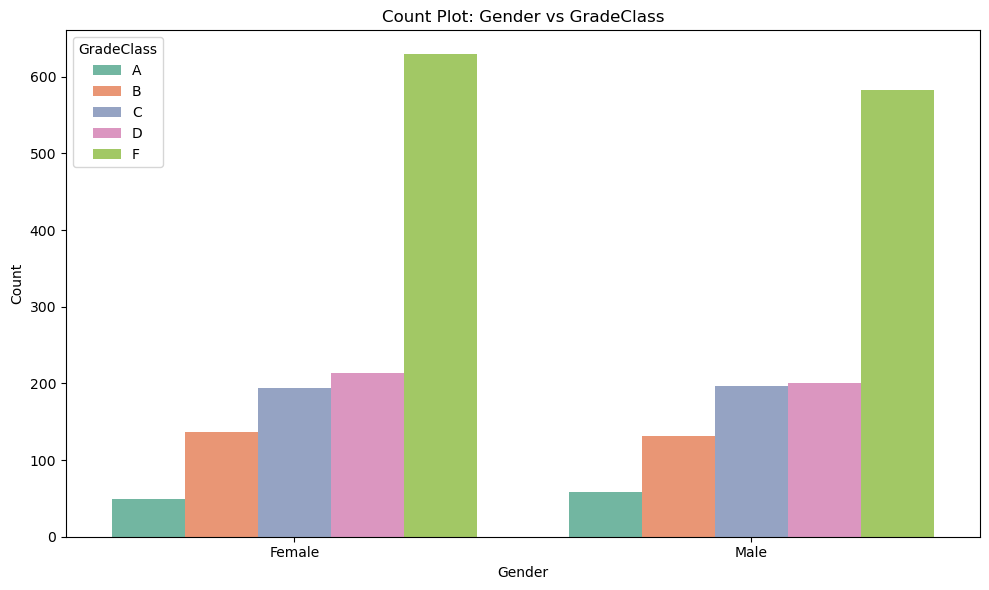

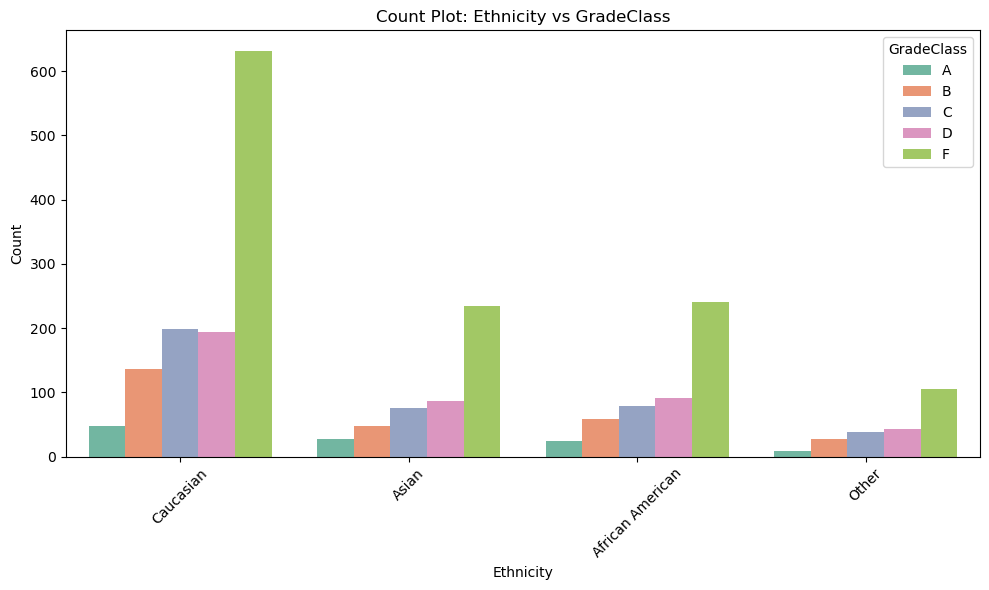

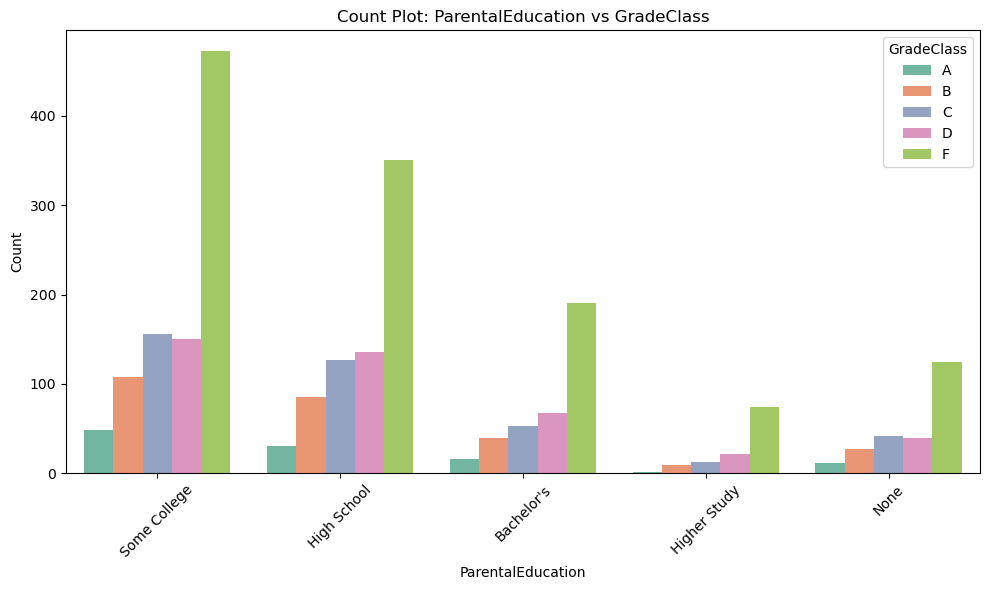

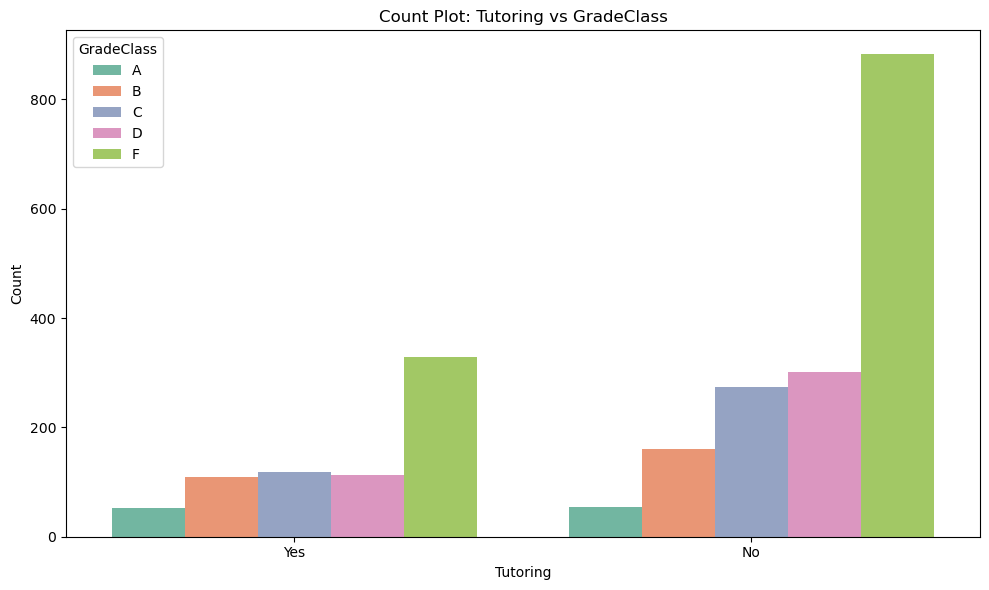

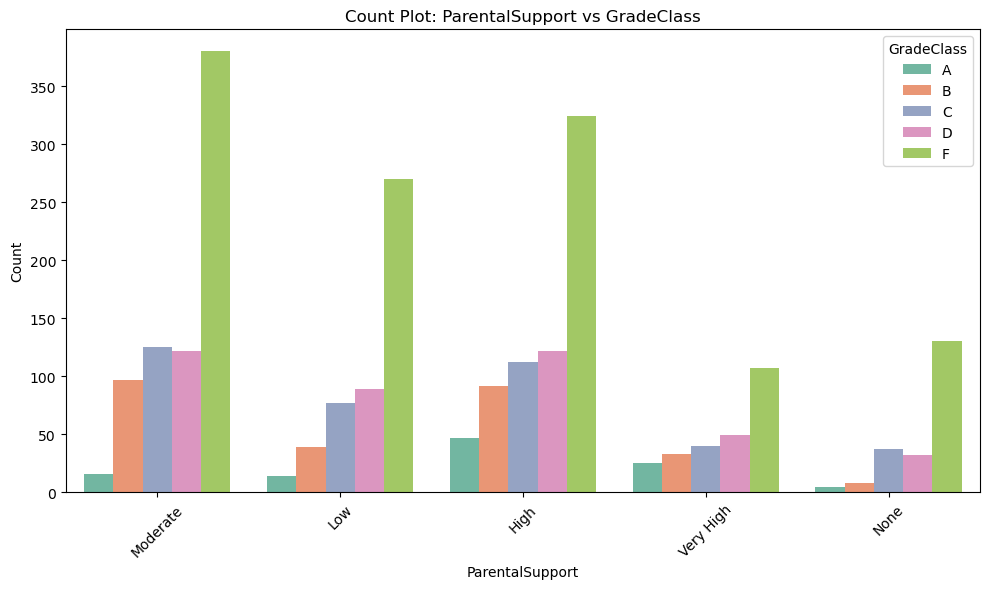

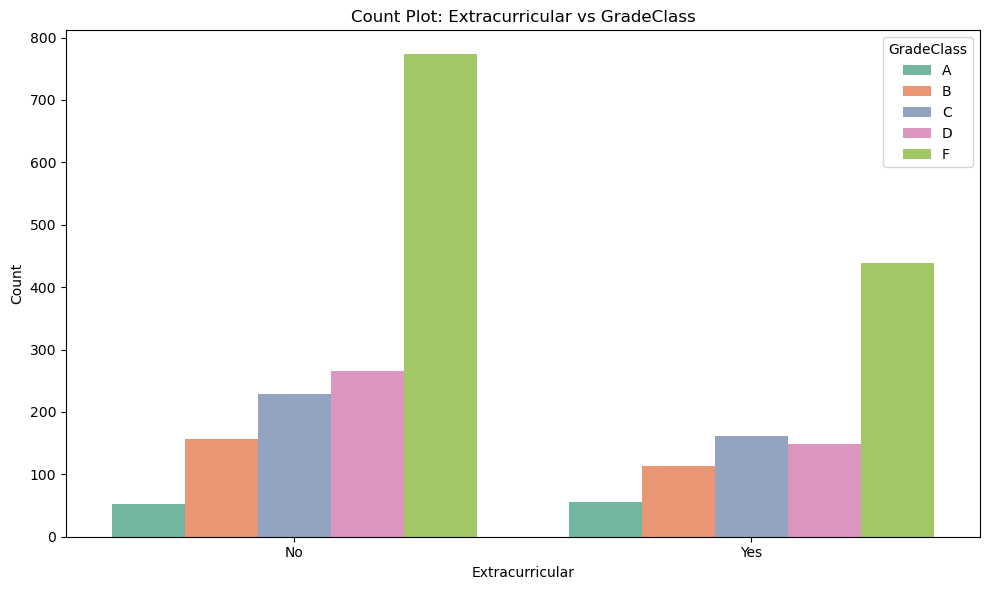

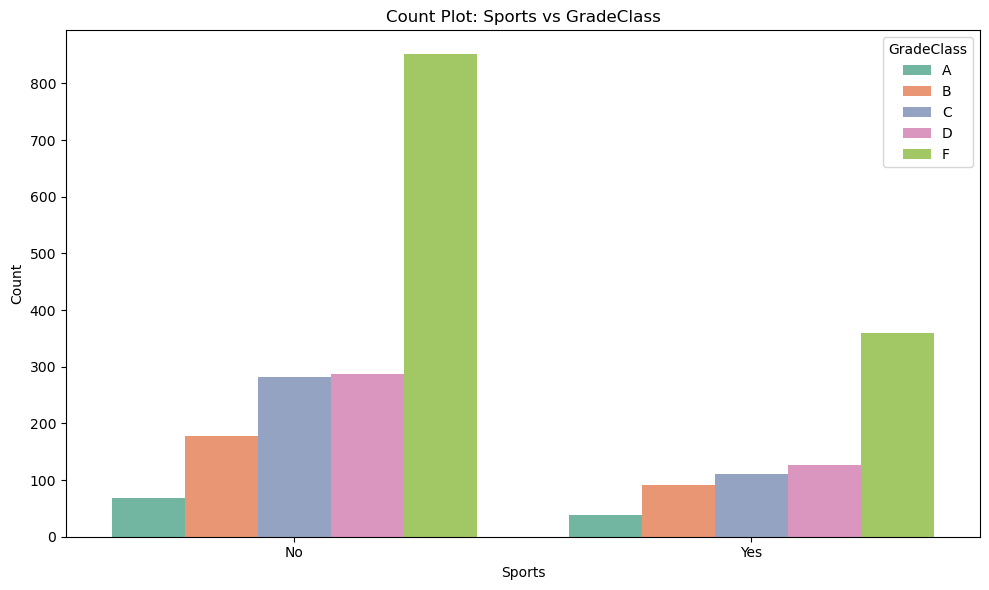

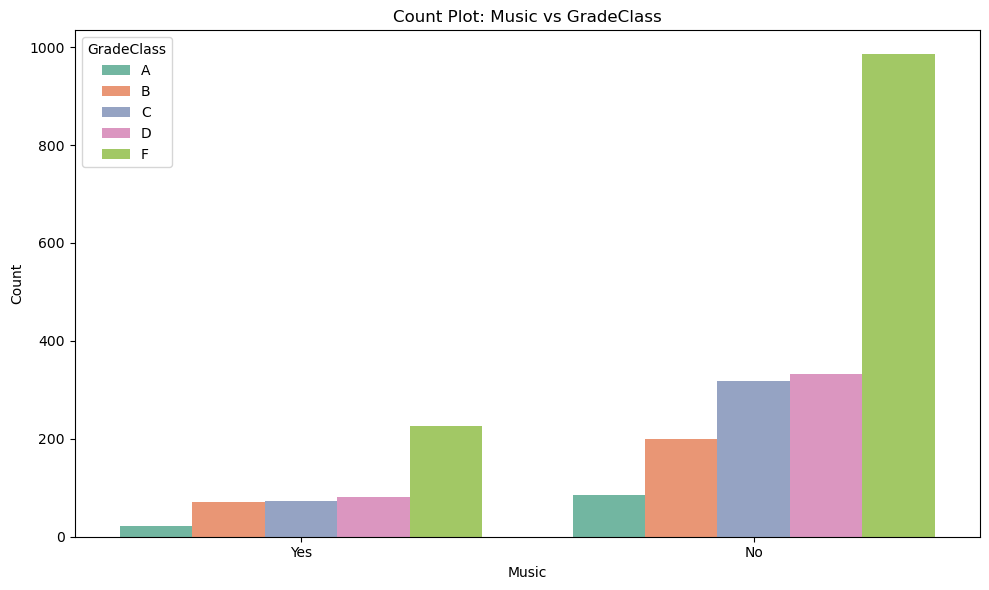

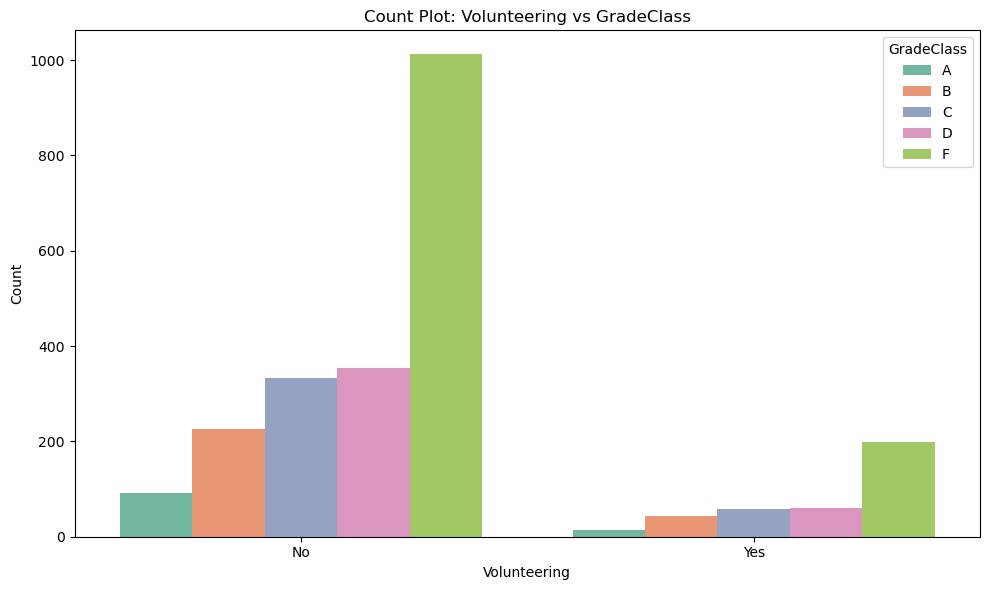

In [68]:
#catagorical
categorical_features = [
    'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
    'Extracurricular', 'Sports', 'Music', 'Volunteering'
]
# display count plots 
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='GradeClass', data=df, hue_order=grade_class_order, palette='Set2')
    plt.title(f'Count Plot: {feature} vs GradeClass')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='GradeClass')
    if feature in ['Ethnicity', 'ParentalEducation', 'ParentalSupport']:
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()

In [69]:
#Understanding transformed data
df_transformed=pd.read_csv(r'..\data\BrightPath_Filtered_Scaled_Dataset.csv')

In [70]:
#univariate
df_transformed.info()
df_transformed.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   float64
 1   Gender             2392 non-null   float64
 2   Ethnicity          2392 non-null   float64
 3   ParentalEducation  2392 non-null   float64
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   float64
 6   Tutoring           2392 non-null   float64
 7   ParentalSupport    2392 non-null   float64
 8   Extracurricular    2392 non-null   float64
 9   Sports             2392 non-null   float64
 10  Music              2392 non-null   float64
 11  Volunteering       2392 non-null   float64
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(14)
memory usage: 261.8 KB


,count,mean,std,min,25%,50%,75%,max
Age,2392.0,8.673849e-16,1.000209,-1.307132,-1.307132,-0.417106,0.472919,1.362944
Gender,2392.0,-1.440691e-16,1.000209,-1.021981,-1.021981,0.978492,0.978492,0.978492
Ethnicity,2392.0,-7.129191e-17,1.000209,-0.853391,-0.853391,-0.853391,1.091641,2.064157
ParentalEducation,2392.0,-2.079347e-17,1.000209,-1.745885,-0.746087,0.253711,0.253711,2.253308
StudyTimeWeekly,2392.0,1.158494e-16,1.000209,-1.728882,-0.836740,-0.011789,0.820374,1.805881
Absences,2392.0,1.559511e-17,1.000209,-1.717694,-0.890822,0.054173,0.881045,1.707916
Tutoring,2392.0,-2.970496e-17,1.000209,-0.656870,-0.656870,-0.656870,1.522371,1.522371
ParentalSupport,2392.0,1.188199e-17,1.000209,-1.890357,-0.999551,-0.108744,0.782063,1.672869
Extracurricular,2392.0,4.232957e-17,1.000209,-0.788476,-0.788476,-0.788476,1.268269,1.268269
Sports,2392.0,-4.158695e-17,1.000209,-0.660132,-0.660132,-0.660132,1.514848,1.514848


In [71]:
# Decode categorical variables by mapping scaled values back to original categories
# Binary variables: Map based on threshold (assuming scaled around 0)
df_transformed['Gender'] = df_transformed['Gender'].apply(lambda x: 1 if x > 0 else 0).map(gender_map)
df_transformed['Tutoring'] = df_transformed['Tutoring'].apply(lambda x: 1 if x > 0 else 0).map(tutoring_map)
df_transformed['Extracurricular'] = df_transformed['Extracurricular'].apply(lambda x: 1 if x > 0 else 0).map(extracurricular_map)
df_transformed['Sports'] = df_transformed['Sports'].apply(lambda x: 1 if x > 0 else 0).map(sports_map)
df_transformed['Music'] = df_transformed['Music'].apply(lambda x: 1 if x > 0 else 0).map(music_map)
df_transformed['Volunteering'] = df_transformed['Volunteering'].apply(lambda x: 1 if x > 0 else 0).map(volunteering_map)

# Multi-category variables: Map based on unique scaled values
ethnicity_scaled_map = {-0.853: 0, 0.119: 1, 1.091: 2, 2.064: 3}  # Inferred from unique values in df_transformed
df_transformed['Ethnicity'] = df_transformed['Ethnicity'].map(ethnicity_scaled_map).map(ethnicity_map)

parental_edu_scaled_map = {-1.745: 0, -0.746: 1, 0.253: 2, 1.253: 3, 2.253: 4}
df_transformed['ParentalEducation'] = df_transformed['ParentalEducation'].map(parental_edu_scaled_map).map(parental_education_map)

parental_support_scaled_map = {-1.890: 0, -0.999: 1, -0.108: 2, 0.782: 3, 1.672: 4}
df_transformed['ParentalSupport'] = df_transformed['ParentalSupport'].map(parental_support_scaled_map).map(parental_support_map)

# Map GradeClass to letter grades
df_transformed['GradeClass'] = df_transformed['GradeClass'].map(grade_class_map)

# Define ordered categories for specific features
parental_education_order = ['None', 'High School', 'Some College', "Bachelor's", 'Higher Study']
parental_support_order = ['None', 'Low', 'Moderate', 'High', 'Very High']
grade_class_order = ['A', 'B', 'C', 'D', 'F']








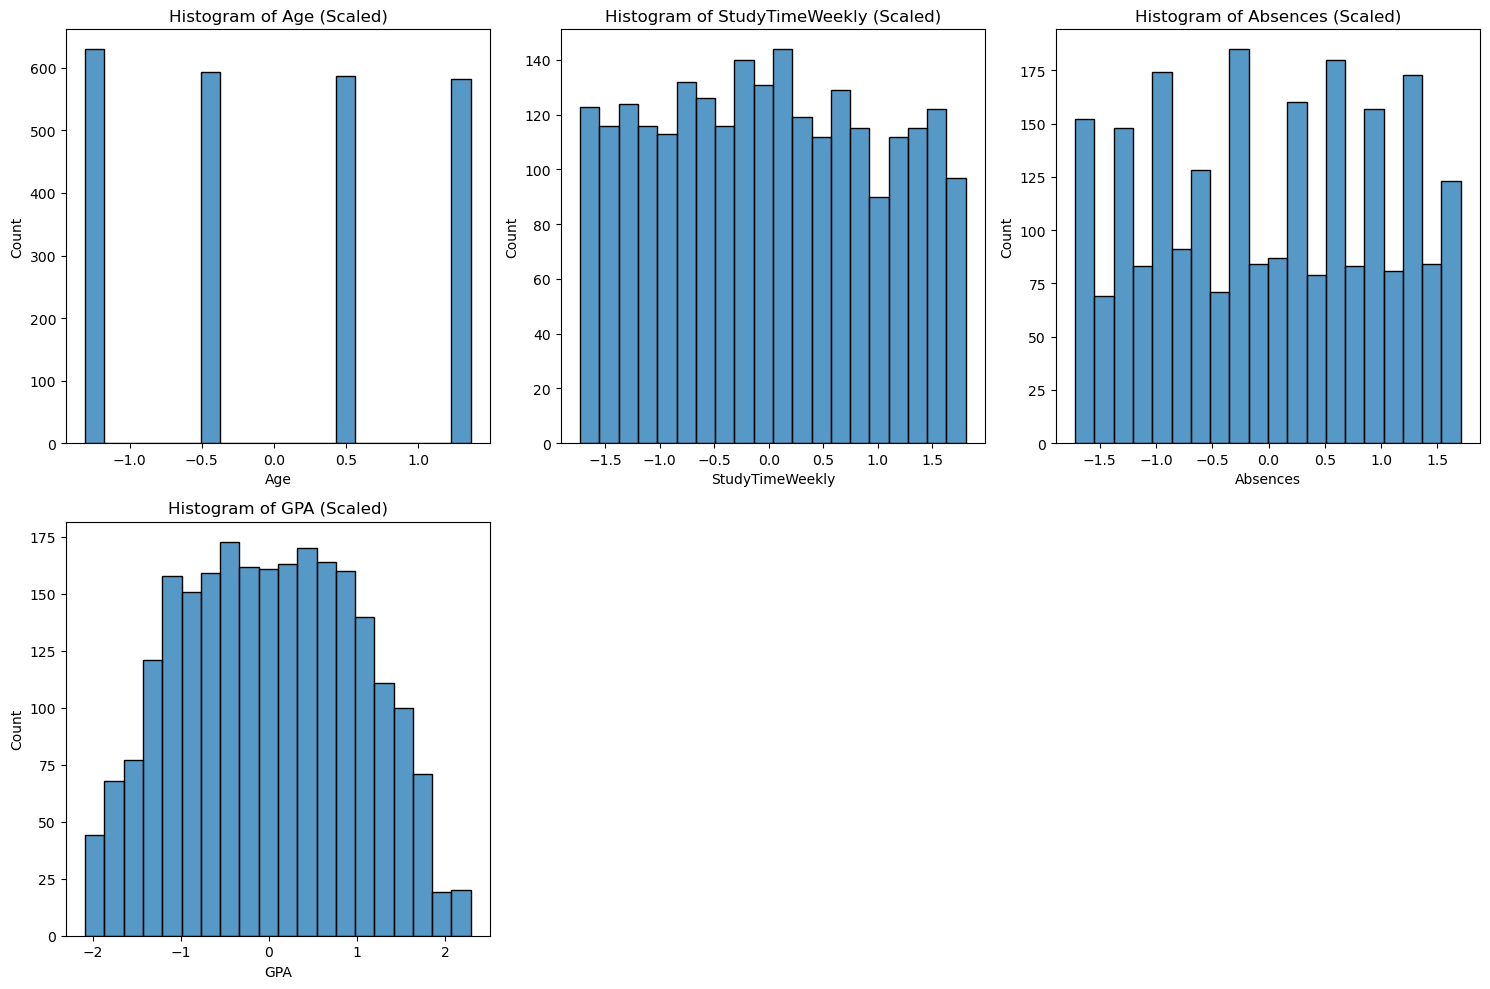

In [72]:
# Univariate Analysis for df_transformed
# Numerical features (scaled)
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
n_cols = 3
n_rows_num = (len(numerical_features) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows_num, n_cols, figsize=(15, 5 * n_rows_num))
axes = axes.flatten()

# Histograms for numerical features
for idx, feature in enumerate(numerical_features):
    sns.histplot(df_transformed[feature], bins=20, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {feature} (Scaled)')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()
plt.close()

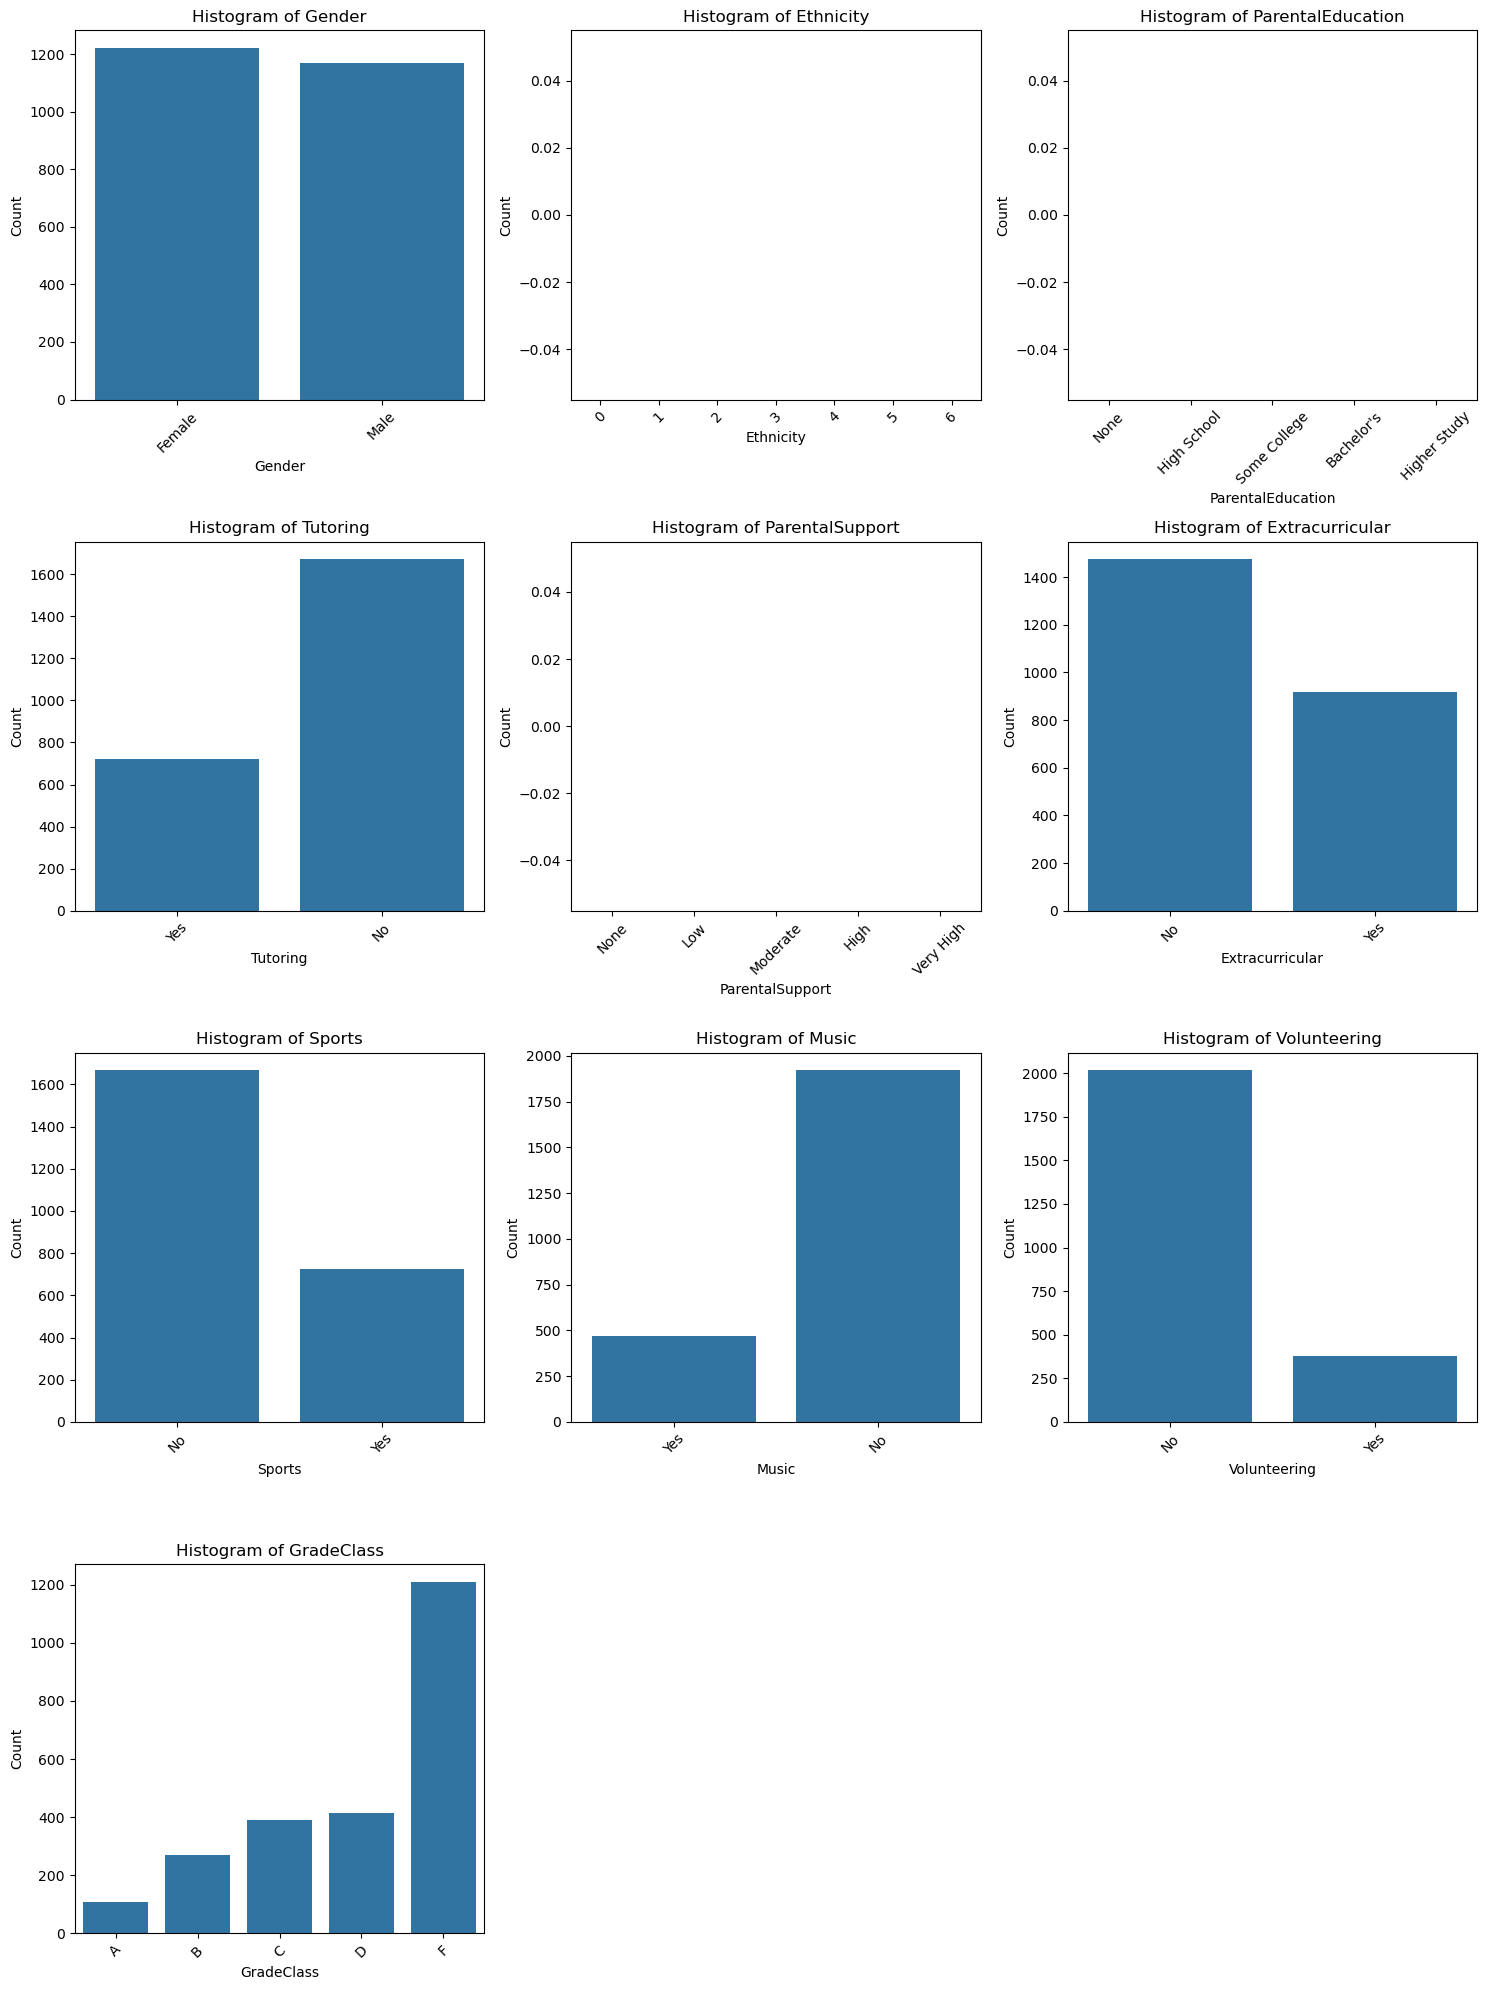

In [73]:
# Categorical features
categorical_features = [
    'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'
]
n_rows_cat = (len(categorical_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows_cat, n_cols, figsize=(15, 5 * n_rows_cat))
axes = axes.flatten()

# Count plots for categorical features
for idx, feature in enumerate(categorical_features):
    if feature == 'ParentalEducation':
        order = parental_education_order
    elif feature == 'ParentalSupport':
        order = parental_support_order
    elif feature == 'GradeClass':
        order = grade_class_order
    else:
        order = None

    sns.countplot(x=feature, data=df_transformed, ax=axes[idx], order=order)
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
plt.close()

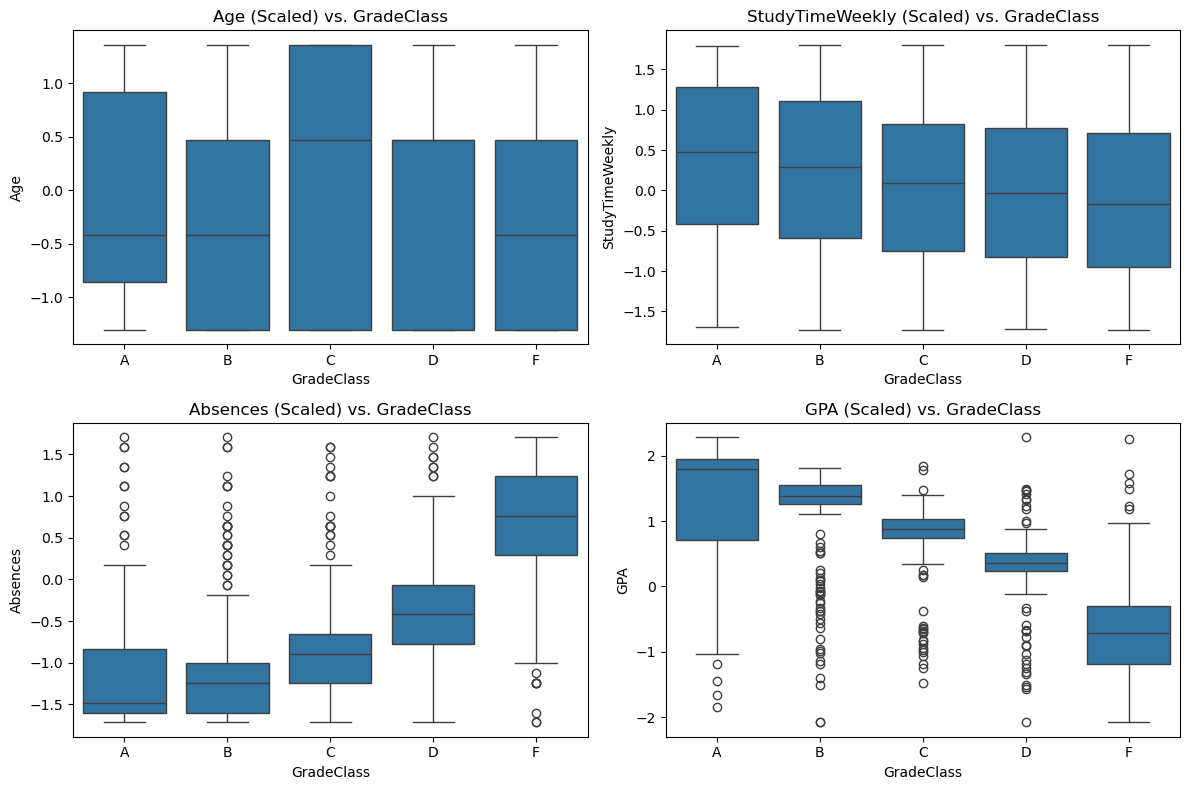

In [74]:
# Bivariate Analysis for df_transformed
# Numerical: Boxplots comparing GradeClass to numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='GradeClass', y=feature, data=df_transformed, ax=axes[idx], order=grade_class_order)
    axes[idx].set_title(f'{feature} (Scaled) vs. GradeClass')
    axes[idx].set_xlabel('GradeClass')
    axes[idx].set_ylabel(feature)
plt.tight_layout()
plt.show()
plt.close()


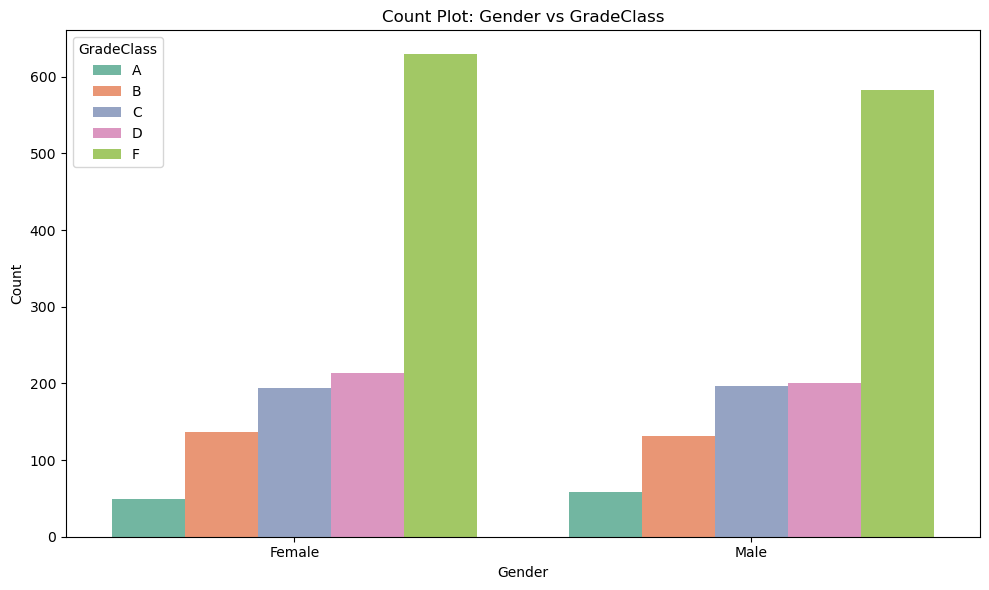

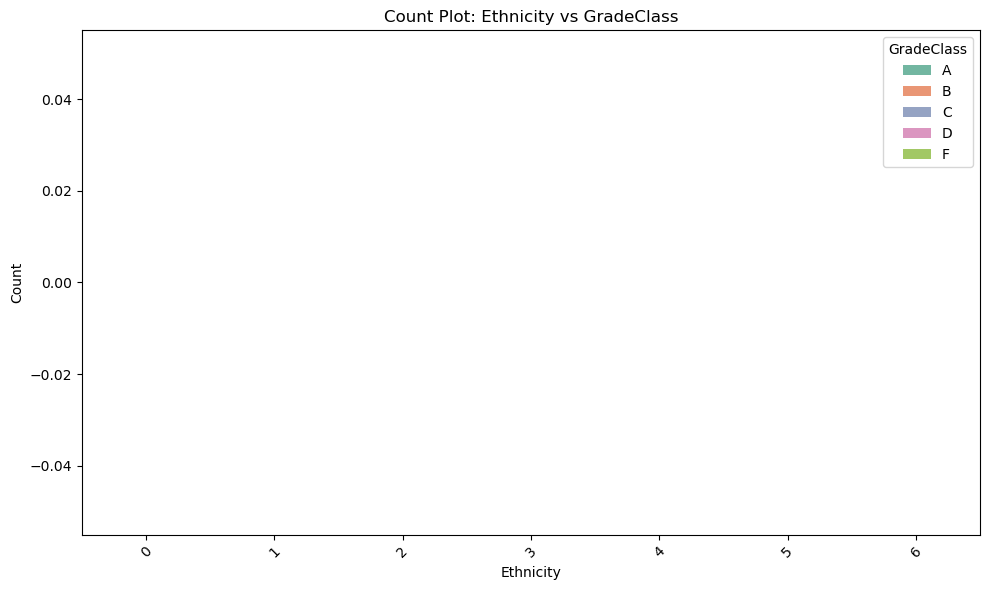

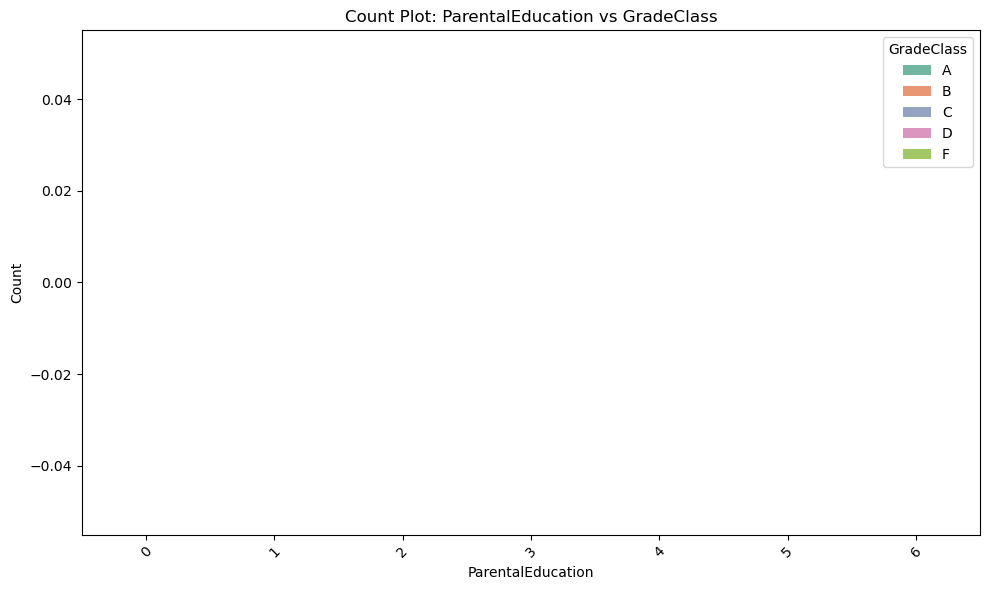

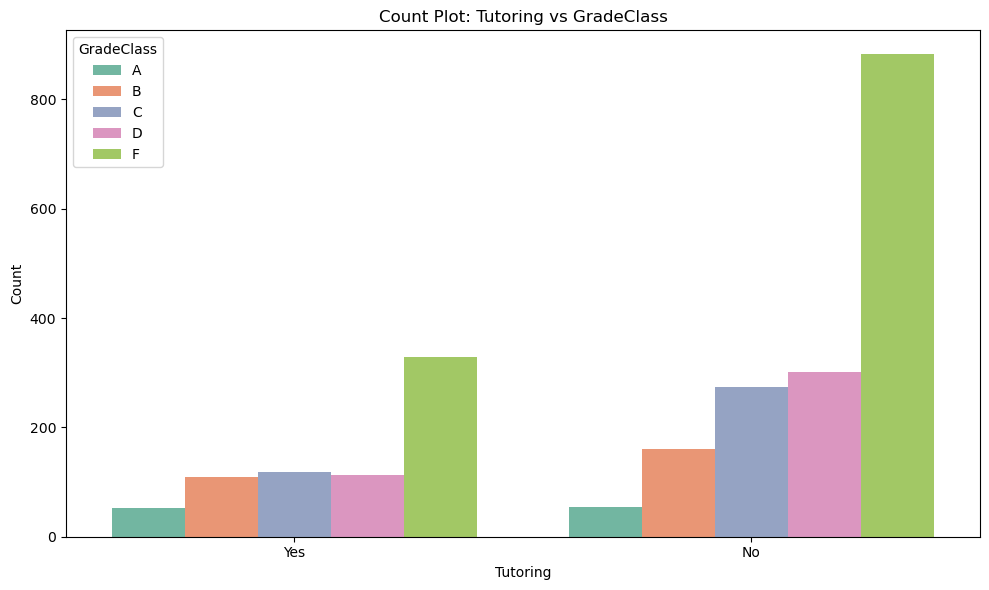

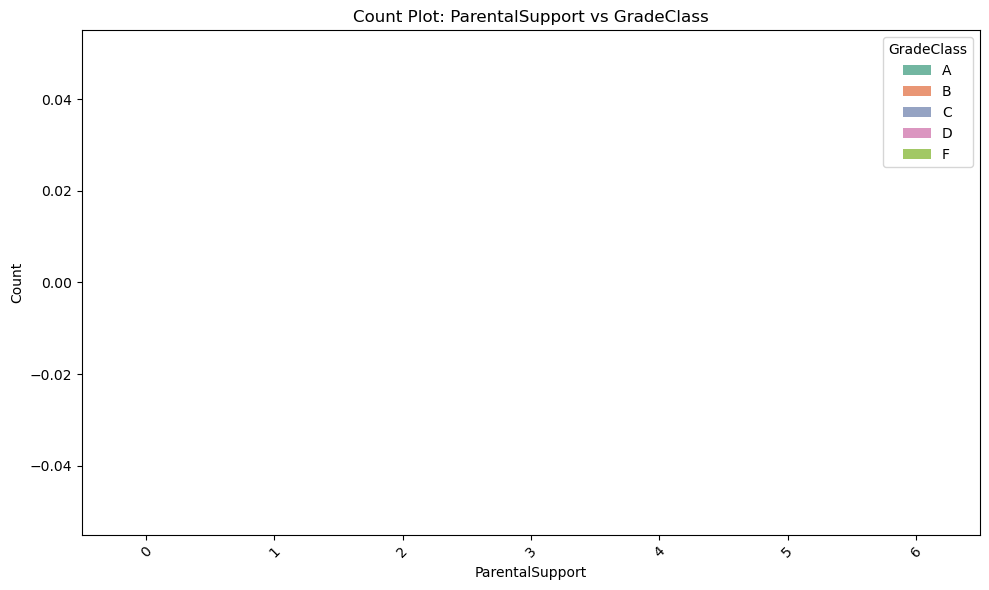

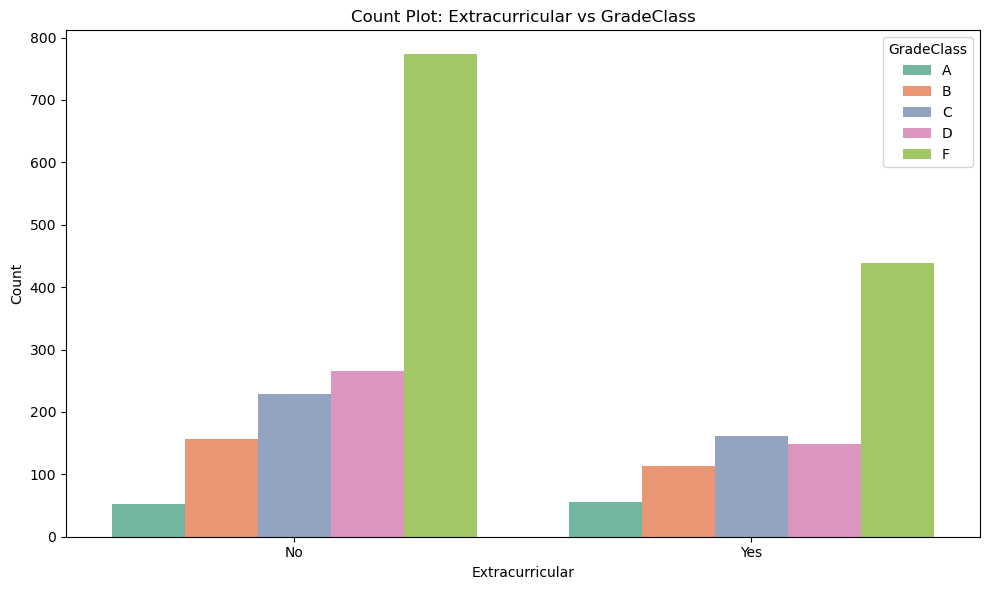

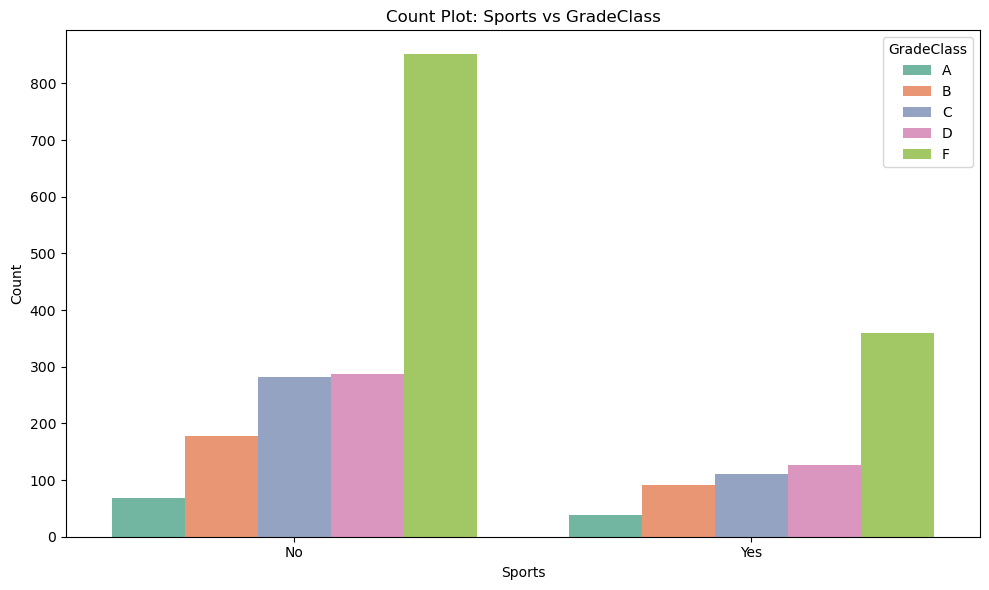

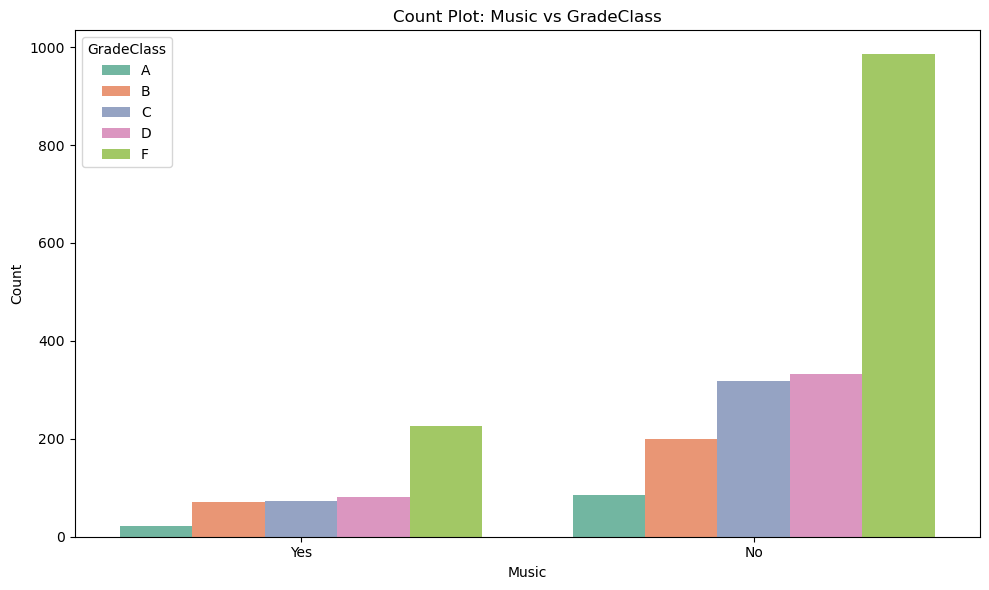

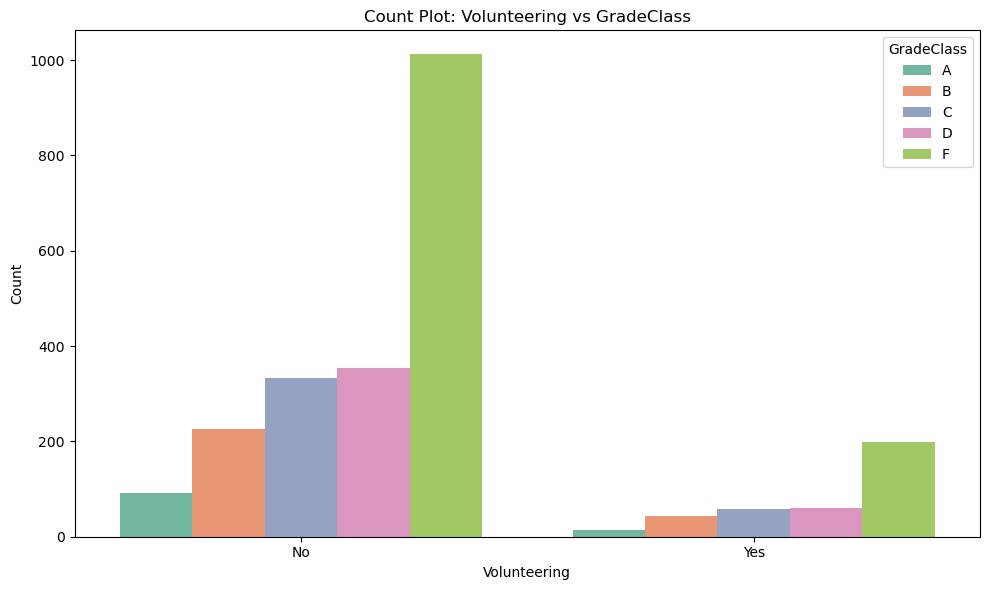

In [75]:
# Categorical: Count plots for categorical features vs GradeClass
categorical_features = [
    'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
    'Extracurricular', 'Sports', 'Music', 'Volunteering'
]
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='GradeClass', data=df_transformed, hue_order=grade_class_order, palette='Set2')
    plt.title(f'Count Plot: {feature} vs GradeClass')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='GradeClass')
    if feature in ['Ethnicity', 'ParentalEducation', 'ParentalSupport']:
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()